<a href="https://colab.research.google.com/github/AngelikaBaloy/scratchpad/blob/main/DS3001_1_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS3001 Jan 27

In [2]:
! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 40 (delta 7), reused 3 (delta 3), pack-reused 31 (from 2)
Receiving objects: 100% (40/40), 188.92 KiB | 1.07 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Download complete
Extracting data files...
Data extracted


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("/content/data/cville_weather.csv")
df.head(5)

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [7]:
df['PRCP'].describe()

,PRCP
count,399.000000
mean,0.259825
std,0.652143
min,0.000000
25%,0.000000
50%,0.000000
75%,0.220000
max,5.680000


<Axes: >

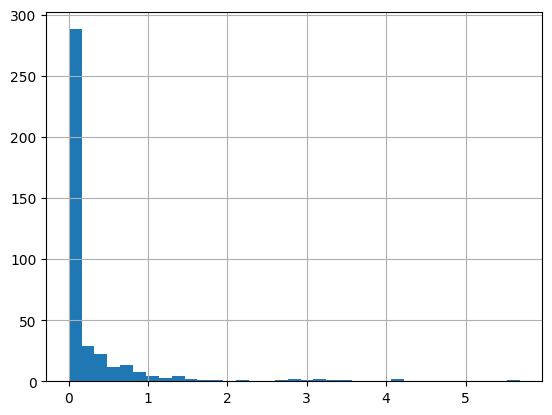

In [9]:
df['PRCP'].hist(bins = 35)

<Axes: xlabel='PRCP', ylabel='Density'>

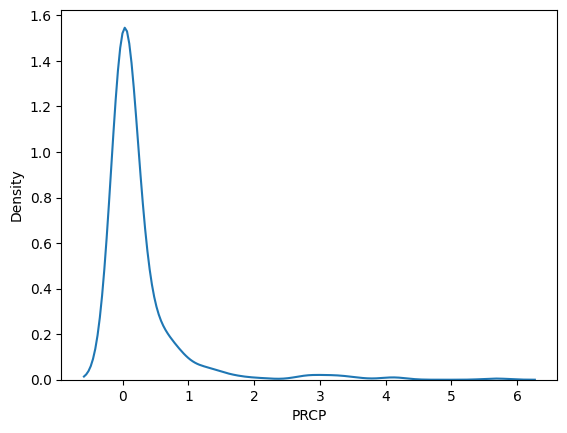

In [12]:
sns.kdeplot(df['PRCP'])

<Axes: xlabel='PRCP'>

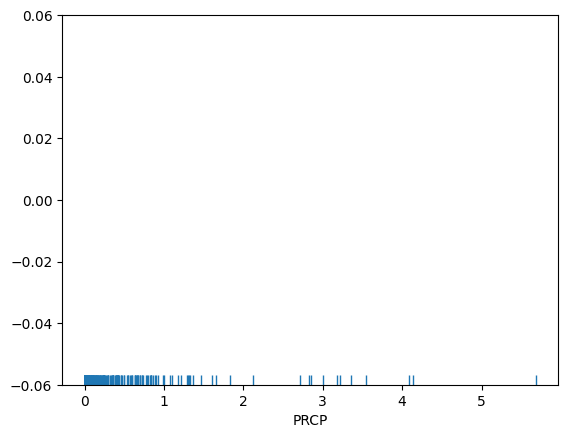

In [13]:
sns.rugplot(df['PRCP'])

<Axes: xlabel='PRCP', ylabel='Count'>

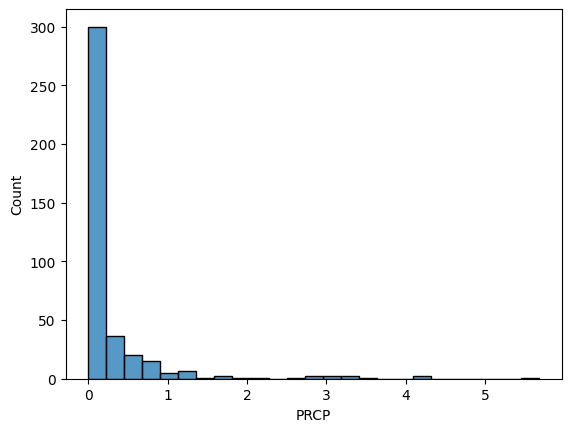

In [21]:
sns.histplot(df['PRCP'], bins = 25) # how does the visual change as you add more bins?
# more isn't always better

KDEs... kernel density plots

In [24]:
df2 = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")

In [41]:
df2['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [33]:
df2['Price'] = df2['Price'].str.replace('$', '')
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')

<Axes: xlabel='Price'>

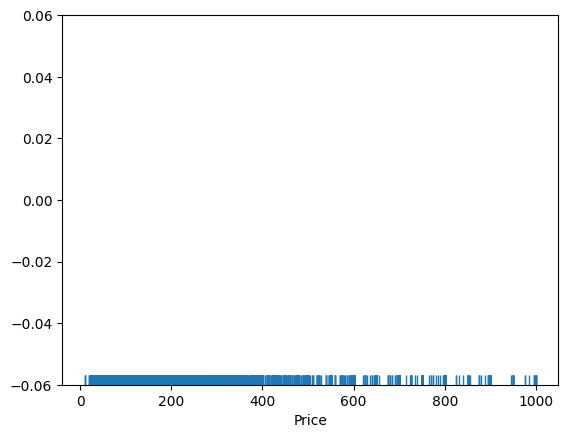

In [35]:
sns.rugplot(df2['Price'])

<Axes: xlabel='Price', ylabel='Density'>

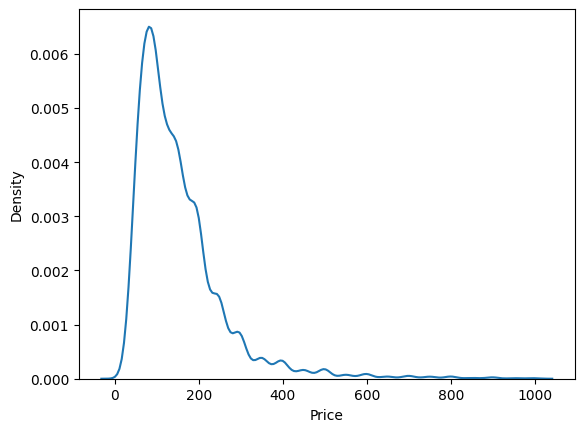

In [34]:
sns.kdeplot(df2['Price']) # how are these made? check the slides for the math
# starts with a rugplot

<Axes: xlabel='Price', ylabel='Count'>

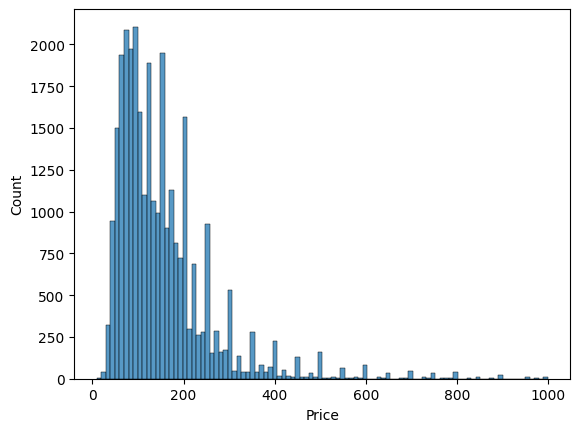

In [36]:
sns.histplot(df2['Price'], bins = 100)

In [38]:
df2.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [39]:
df2['Property Type'].value_counts()

,count
Property Type,
Apartment,27102
House,2090
Loft,753
Bed & Breakfast,180
Townhouse,136
Condominium,94
Other,47
Dorm,31
Boat,8


/tmp/ipython-input-2781559891.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df2["Price"], hue = df2["Property Type"], common_norm = False)


<Axes: xlabel='Price', ylabel='Density'>

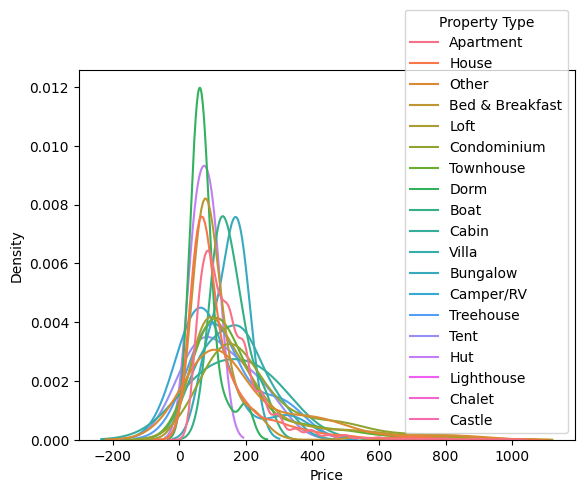

In [40]:
sns.kdeplot(x=df2["Price"], hue = df2["Property Type"], common_norm = False)
# hue = differentiate by categorical variable

In [42]:
df2.loc[:, ['Price', 'Property Type']].groupby('Property Type').describe()
# categorical conditioning
# numeric y categorical x

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         93.0  237.946237  172.754121   46.0  130.00  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2060.0  131.598058  127.421195   10.0   60.00   84.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               738.0  193.166667  169.094068   30.0   80.00  135.0   
Other               42.0  201.166667  183.231150   39.0   80.50  122.5   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          134.0  179.365672  152.097295   45.0   88.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                7.0  160.571429   83.908397   60.0   95.00  180.0   

                                
                    75%    max  
Property Type                   
Apartment        195.00  999.0  
Bed & Breakfast  125.00  900.0  
Boat             178.50  250.0  
Bungalow         177.75  195.0  
Cabin            207.50  250.0  
Camper/RV        109.00  325.0  
Castle           150.00  150.0  
Chalet            99.00   99.0  
Condominium      295.00  850.0  
Dorm              80.00  200.0  
House            150.00  997.0  
Hut               87.50  100.0  
Lighthouse        39.00   39.0  
Loft             225.75  985.0  
Other            256.25  850.0  
Tent             175.00  250.0  
Townhouse        200.00  900.0  
Treehouse        156.00  300.0  
Villa            197.50  299.0

<Axes: xlabel='Price', ylabel='Beds'>

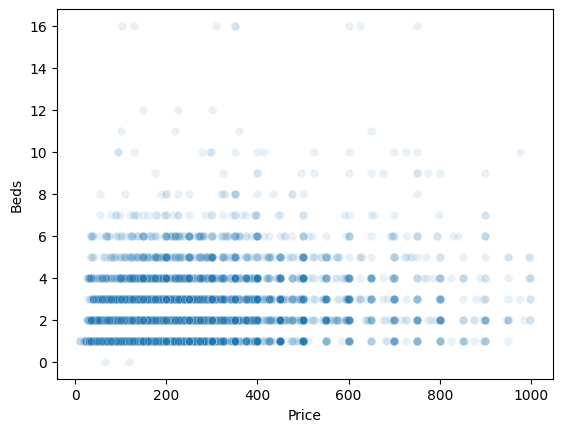

In [45]:
sns.scatterplot(x=df2["Price"], y = df2["Beds"], alpha =.1) # sorry this is a bad example
# point is, numeric-numeric
# alpha gets rid of noise and tells you where the true mass is

In [ ]:
# hetero-sekdasticity (in his example, not mine)

In [46]:
df2.loc[:, ['Price', 'Beds']].cov() # computing the covariance
# i know this is a bad example but for the sake of continuity....
# unscaled

,Price,Beds
Price,11858.273138,45.189494
Beds,45.189494,1.030953


In [47]:
df2.loc[:, ["Price", "Beds"]].corr() # computing the correlation
# scaled/normalized - divided by SD of each of the variables

,Price,Beds
Price,1.000000,0.422168
Beds,0.422168,1.000000


In [57]:
# categorical-categorical
df3 = pd.read_csv('/content/data/cars_hw.csv')
df3.head(5)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [61]:
df_3_v2 = df3.loc[:, ['Transmission', 'Transmission_Type']]
df_3_v2.head(5)

,Transmission,Transmission_Type
0,7-Speed,Automatic
1,5-Speed,Manual
2,5-Speed,Manual
3,5-Speed,Manual
4,5-Speed,Manual


In [62]:
pd.crosstab(df_3_v2['Transmission'], df_3_v2['Transmission_Type'])


Transmission_Type,Automatic,Manual
Transmission,,
4-Speed,21,18
5-Speed,156,593
6-Speed,73,96
7-Speed,11,5
CVT,3,0


In [63]:
pd.crosstab(df_3_v2['Transmission'], df_3_v2['Transmission_Type'], dropna=True, normalize=True)
# hmm!!

Transmission_Type,Automatic,Manual
Transmission,,
4-Speed,0.021516,0.018443
5-Speed,0.159836,0.607582
6-Speed,0.074795,0.098361
7-Speed,0.011270,0.005123
CVT,0.003074,0.000000


Visualization

In [64]:
import matplotlib.pyplot as plt

In [69]:
df4 = pd.read_csv('/content/data/craiglist_cville_cars_long.csv')
df4.head()

,Unnamed: 0,title,price,year,link,brand,age,log_price,log_age,title.1,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,20.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,232450,silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,18.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,148086,missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,28.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,179000,red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,26.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,195338,silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,102483,missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


In [71]:
df4['price'].describe()

,price
count,92.000000
mean,8589.706522
std,8170.544206
min,1000.000000
25%,3187.500000
50%,5650.000000
75%,10625.000000
max,38000.000000


<Axes: xlabel='price', ylabel='Density'>

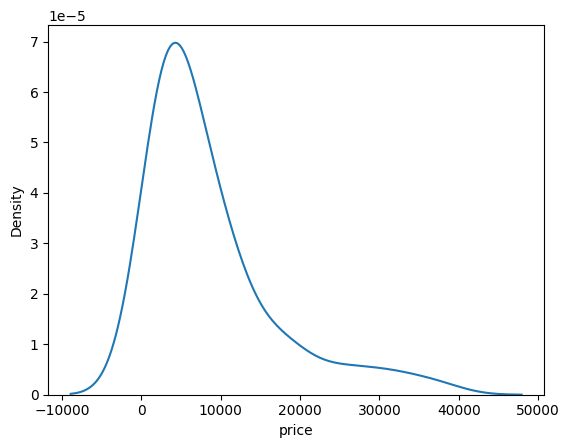

In [70]:
sns.kdeplot(df4['price']) # why is it negative? it's just shifting in a weird way

<Axes: xlabel='price', ylabel='Count'>

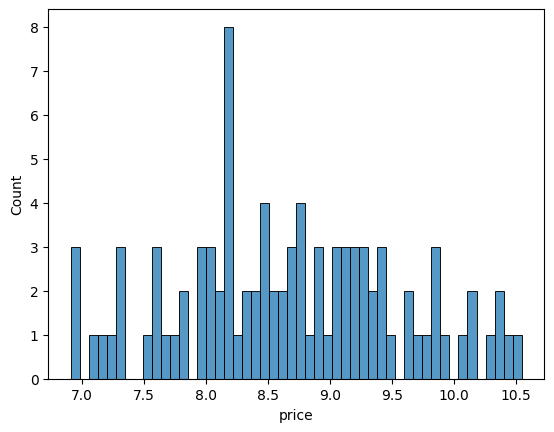

In [75]:
sns.histplot(np.log(df4['price']), bins= 50)

<Axes: xlabel='price', ylabel='Proportion'>

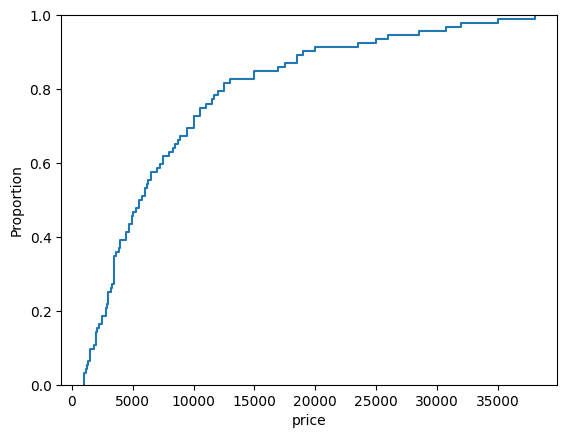

In [76]:
sns.ecdfplot(df4['price']) # reading proportions at and below numbers
# cumulative distributions
# less ambiguity than kde plot
# you can start thinking about the median (50% above/below) and whatever your heart desires

In [78]:
np.quantile(df4['price'], .75) # gives 75th %ile

np.float64(10625.0)

Outliers